<a href="https://colab.research.google.com/github/sendmail123/DataScience/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:


!pip install tensorflow-gpu



In [0]:
from keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

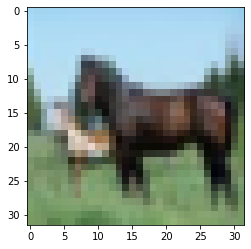

In [8]:
plt.imshow(x_train[12])

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
#x_test[0]

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [42]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Conv2D, Dense, MaxPool2D,Flatten

In [0]:
import tensorflow as tf
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [45]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 16s 326us/sample - loss: 2.3028 - accuracy: 0.0988
Epoch 2/10
50000/50000 [==============================] - 9s 186us/sample - loss: 2.3028 - accuracy: 0.0997
Epoch 3/10
50000/50000 [==============================] - 9s 184us/sample - loss: 2.3028 - accuracy: 0.0982
Epoch 4/10
50000/50000 [==============================] - 9s 185us/sample - loss: 2.3028 - accuracy: 0.0971
Epoch 5/10
50000/50000 [==============================] - 9s 186us/sample - loss: 2.3028 - accuracy: 0.0984
Epoch 6/10
50000/50000 [==============================] - 9s 183us/sample - loss: 2.3028 - accuracy: 0.0985
Epoch 7/10
50000/50000 [==============================] - 9s 184us/sample - loss: 2.3028 - accuracy: 0.0980
Epoch 8/10
50000/50000 [==============================] - 9s 184us/sample - loss: 2.3028 - accuracy: 0.0970
Epoch 9/10
50000/50000 [==============================] - 9s 184us/sample - loss: 2.3028 - accuracy: 0.0970
Epoch 10/10
50000/50000 [==

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 110us/sample - loss: 2.3027 - accuracy: 0.1000


[2.3026527194976807, 0.1]

In [0]:
from sklearn.metrics import classification_report


In [0]:
prediction = model.predict_classes(x_test)

In [51]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model.save('bad_model.h5')